<a href="https://colab.research.google.com/github/Priyal95/ML-Titanic-dataset/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as ols
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# **Loading data**



In [ ]:
Gender_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/gender_submission.csv")

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/test.csv")

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/train.csv")

In [ ]:
Gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Merging the data together**

In [ ]:
#Merging the gender data to test as they have the same PassengerID
Merged= pd.merge(Gender_submission,test,on=['PassengerId'])

In [ ]:
Merged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#Creating a fulldata by comtating the merged to train
# This will also help in EDA
Fulldata= pd.concat([train,Merged])

In [ ]:
Fulldata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **Cleaning data** 


**Checking for duplicate values**

```
# .duplicated().sum() shows that there are no duplicate values
```



In [ ]:
Fulldata.duplicated().sum()

0

**Checking for null values**

In [ ]:
Fulldata.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

**Embarked** 

1.   Since there are only two missing values I am replacing them by mode




In [ ]:
Fulldata['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
Fulldata['Embarked']=Fulldata['Embarked'].fillna('S')

**Cabin**

In [ ]:
Fulldata['Cabin'] = pd.factorize(Fulldata['Cabin'])[0] + 1

In [ ]:
Fulldata.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428,0.179186
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622,0.176895
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.602418
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.272991
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.034496
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.022196
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000,0.408581
Cabin,0.179186,0.176895,-0.602418,0.272991,-0.034496,-0.022196,0.408581,1.000000


In [ ]:
from statsmodels.formula.api import ols
model = ols(formula = 'Survived ~ Cabin', data= Fulldata)
res = model.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     42.22
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           1.16e-10
Time:                        05:59:44   Log-Likelihood:                -888.66
No. Observations:                1309   AIC:                             1781.
Df Residuals:                    1307   BIC:                             1792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3400      0.014     23.623      0.000       0.312       0.368
Cabin          0.0020      0.000      6.498      0.000       0.001       0.003
==============================================================================
Omnibus:                     7038.599   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.934
Skew:                           0.490   Prob(JB):                     7.72e-43
Kurtosis:                       1.390   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Fulldata.drop("Cabin", axis=1, inplace=True)

In [ ]:
Fulldata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [ ]:
Fulldata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [ ]:
from statsmodels.formula.api import ols
model = ols(formula = 'Age ~  SibSp +Sex + Pclass', data= Fulldata)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     102.2
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           5.56e-58
Time:                        05:59:44   Log-Likelihood:                -4139.7
No. Observations:                1046   AIC:                             8287.
Df Residuals:                    1042   BIC:                             8307.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      45.2641      1.179     38.384      0.000      42.950      47.578
Sex[T.male]     3.0707      0.825      3.721      0.000       1.451       4.690
SibSp          -3.3877      0.433     -7.822      0.000      -4.238      -2.538
Pclass         -7.0720      0.472    -14.973      0.000      -7.999      -6.145
==============================================================================
Omnibus:                       23.113   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.011
Skew:                           0.326   Prob(JB):                     3.71e-06
Kurtosis:                       3.385   Cond. No.                         8.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
grouping_age_pclass_sex = Fulldata.groupby(['Pclass', 'SibSp']).Age.agg(['median'])
grouping_age_pclass_sex

median
Pclass SibSp        
1      0        38.0
       1        39.0
       2        47.0
       3        23.5
2      0        29.0
       1        29.0
       2        22.5
       3        30.0
3      0        25.0
       1        24.0
       2        19.5
       3         8.0
       4         7.0
       5        10.5
       8        14.5

In [ ]:
fem_p1_s0 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 1) & (Fulldata.SibSp == 0)].Age.median()
fem_p1_s1 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 1) & (Fulldata.SibSp == 1)].Age.median()
fem_p1_s2 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 1) & (Fulldata.SibSp == 2)].Age.median()
fem_p1_s3 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 1) & (Fulldata.SibSp == 3)].Age.median()
fem_p2_s0 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 2) & (Fulldata.SibSp == 0)].Age.median()
fem_p2_s1 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 2) & (Fulldata.SibSp == 1)].Age.median()
fem_p2_s2 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 2) & (Fulldata.SibSp == 2)].Age.median()
fem_p2_s3 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 2) & (Fulldata.SibSp == 3)].Age.median()
fem_p3_s0 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 0)].Age.median()
fem_p3_s1 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 1)].Age.median()
fem_p3_s2 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 2)].Age.median()
fem_p3_s3 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 3)].Age.median()
fem_p3_s4 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 4)].Age.median()
fem_p3_s5 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 5)].Age.median()
fem_p3_s8 =Fulldata.loc[(Fulldata.Sex == 'female') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 8)].Age.median()
male_p1_s0 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 1) & (Fulldata.SibSp == 0)].Age.median()
male_p1_s1 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 1) & (Fulldata.SibSp == 1)].Age.median()
male_p1_s2 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 1) & (Fulldata.SibSp == 1)].Age.median()
male_p1_s3 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 1) & (Fulldata.SibSp == 3)].Age.median()
male_p2_s0 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 2) & (Fulldata.SibSp == 0)].Age.median()
male_p2_s1 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 2) & (Fulldata.SibSp == 1)].Age.median()
male_p2_s2 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 2) & (Fulldata.SibSp == 2)].Age.median()
male_p3_s0 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 0)].Age.median()
male_p3_s1 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 1)].Age.median()
male_p3_s2 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 2)].Age.median()
male_p3_s3 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 3)].Age.median()
male_p3_s4 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 4)].Age.median()
male_p3_s5 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 5)].Age.median()
male_p3_s6 = Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 6)].Age.median()
male_p3_s8 =Fulldata.loc[(Fulldata.Sex == 'male') & (Fulldata.Pclass == 3) & (Fulldata.SibSp == 8)].Age.median()

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
# Filling missing values with average age of women and men in each class
def Age_tran(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=Fulldata.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

In [ ]:
#using lamda to creat a new coloum for age where all missing values are replaced by median
Fulldata['Median_age']= Fulldata.apply(lambda x: Age_tran(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

In [ ]:
Fulldata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Median_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,26.0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,39.0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,38.5
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,26.0


In [ ]:
# checking for na values in the median age coloumn
Fulldata['Median_age'].isnull().sum()

0

In [ ]:
Fulldata['Median_age'] = Fulldata['Median_age'].astype(int)

In [ ]:
Fulldata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Median_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,26
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,39
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,38
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,26


In [ ]:
#ValueError: cannot reindex from a duplicate axis
Fulldata= Fulldata.reset_index()

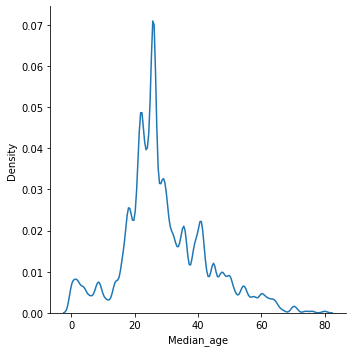

In [ ]:
sns.displot(Fulldata, x="Median_age", kind="kde", bw_adjust=.25)

# **The Median age of people on the ship is around 30 years**

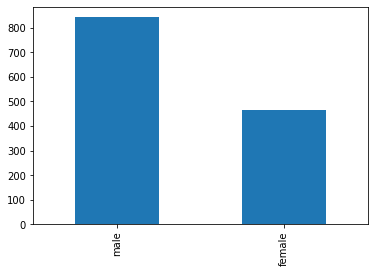

In [ ]:
Fulldata['Sex'].value_counts().plot(kind='bar')

In [ ]:
print(f'Percentage of males in the ship:',(Fulldata['Sex']=='male').sum()/len(Fulldata['Sex'])*100)
print(f'Percentage of females in the ship:',(100-(Fulldata['Sex']=='male').sum()/len(Fulldata['Sex'])*100))

Percentage of males in the ship: 64.40030557677616
Percentage of females in the ship: 35.59969442322384


In [ ]:
Sex_sur= Fulldata.groupby(['Sex','Survived']).size().reset_index(name="Count")
Sex_sur

,Sex,Survived,Count
0,female,0,81
1,female,1,385
2,male,0,734
3,male,1,109


# **Females survived more than male**

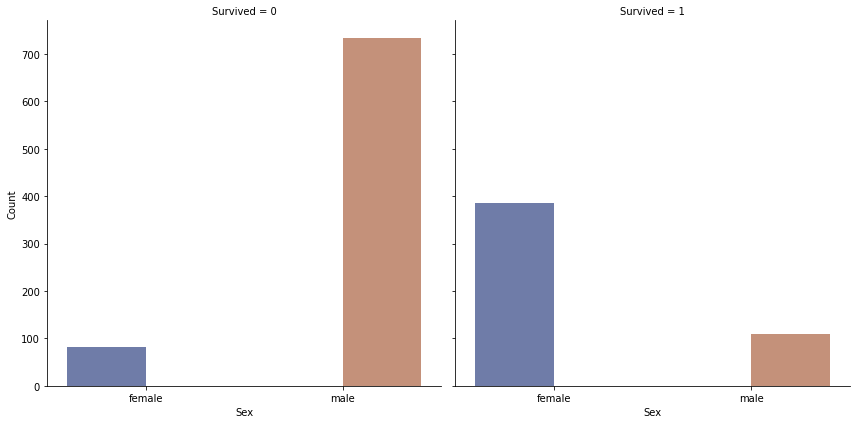

In [ ]:
sns.catplot(
    data=Sex_sur, kind="bar",
    x="Sex", y="Count", hue="Sex",col="Survived",
     palette="dark", alpha=.6, height=6)

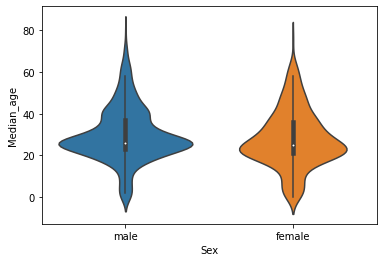

In [ ]:
sns.violinplot(data=Fulldata, x='Sex', y='Median_age')

In [ ]:
GB_emsur = Fulldata.groupby(['Embarked','Survived']).size().reset_index(name="Count")
GB_emsur

,Embarked,Survived,Count
0,C,0,137
1,C,1,133
2,Q,0,69
3,Q,1,54
4,S,0,609
5,S,1,307


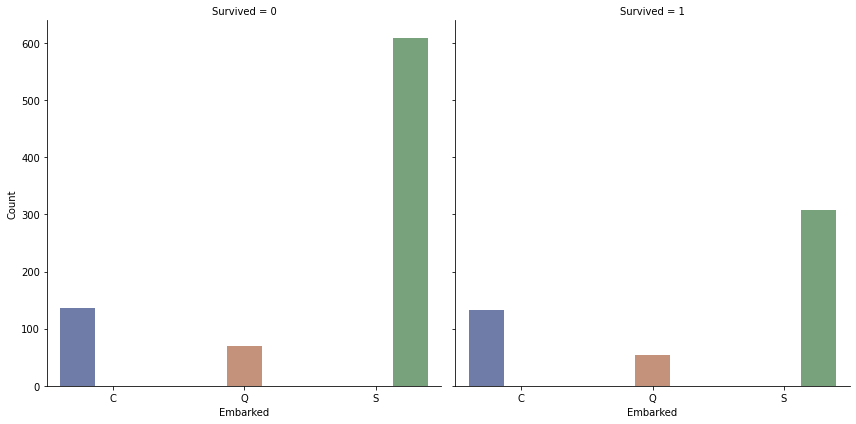

In [ ]:
sns.catplot(
    data=GB_emsur, kind="bar",
    x="Embarked", y="Count", hue="Embarked",col="Survived",
     palette="dark", alpha=.6, height=6)

# **Feature Enginering**


In [ ]:
#A function that does a simple calculation of family size
def Calfamsize (a,b):
  FamilySize = a+b+1
  return FamilySize

In [ ]:
#Using the Calfamsize on all three datasets
Fulldata['FamilySize']= Calfamsize(Fulldata['SibSp'], Fulldata['Parch'])
test['FamilySize']= Calfamsize(test['SibSp'], test['Parch'])
train['FamilySize']= Calfamsize(train['SibSp'], train['Parch'])

In [ ]:
# If the passanger was alone or not
def tagalong (a):
  if a > 1: # if familysize is more than one then the passanger is not alone and returns zero
    return 0
  else:
    return 1 #if familysize is more than one then the passanger is alone and returns 1
  return tagalong


In [ ]:
#Cheching if the functions works
tagalong(2)

0

In [ ]:
# Since the function needs a coloum with numbers 1 and >1 we use transform
# We transform it to Familysize for all the three datasets
Fulldata['IsAlone']=Fulldata.FamilySize.transform(tagalong)
test['IsAlone']=test.FamilySize.transform(tagalong)
train['IsAlone']=train.FamilySize.transform(tagalong)

In [ ]:
Fulldata['Age'].value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64

In [ ]:
#Binning the median age into bins of five
def cate_age (a):
  bins = pd.cut(a.astype(int),5)
  return bins

In [ ]:
Fulldata['Agebins']= cate_age(Fulldata['Median_age'])

In [ ]:


# A function that helps in creating title 
# defining a function that first splits the sting then and gets the tittle from name 
# Since, there are a lot of title we observe a pattern here i.e the miscellaneous once have a value count less than 10 (returns a boolean)
# We use the value count and loop it in a for loop
# For tittle where the value is less 10 i.e True it picks that index and change it to Misc else it replace the title with value itself
def misc_titles (a):
  title = a.str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
  title_names = title.value_counts() < 10
  for i, val in title.items():
    if title_names[val] == True:
      title[i] = "Misc"
    else:
      title[i] = val
  return title

# **Same function done using lambda**

# def misc_titles (a):
#   title = a.str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
#   title_names= title.value_counts() < 10
#   title= title.apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
#   return title




In [ ]:
Fulldata['Title'] = Fulldata.Name.transform(misc_titles)
# misc_titles(Fulldata.Name)


In [ ]:
Fulldata

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Median_age,FamilySize,IsAlone,Agebins,Title
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22,2,0,"(16.0, 32.0]",Mr
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38,2,0,"(32.0, 48.0]",Mrs
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26,1,1,"(16.0, 32.0]",Miss
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35,2,0,"(32.0, 48.0]",Mrs
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35,1,1,"(32.0, 48.0]",Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,26,1,1,"(16.0, 32.0]",Mr
1305,414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,39,1,1,"(32.0, 48.0]",Misc
1306,415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,38,1,1,"(32.0, 48.0]",Mr
1307,416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,26,1,1,"(16.0, 32.0]",Mr


# **Pclass**

In [ ]:
Pclass_survived = Fulldata.groupby(['Sex','Pclass','Survived']).size().reset_index(name="Count")
Pclass_survived

,Sex,Pclass,Survived,Count
0,female,1,0,3
1,female,1,1,141
2,female,2,0,6
3,female,2,1,100
4,female,3,0,72
5,female,3,1,144
6,male,1,0,134
7,male,1,1,45
8,male,2,0,154
9,male,2,1,17


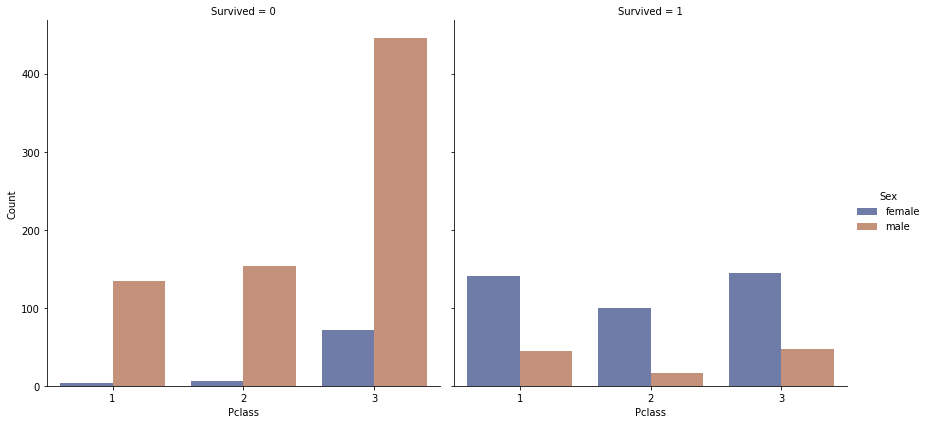

In [ ]:
sns.catplot(
    data=Pclass_survived, kind="bar",
    x="Pclass", y="Count", hue="Sex",col="Survived",
     palette="dark", alpha=.6, height=6)

# **Cleaning Test data**

In [ ]:
fem_p1_s0 =test.loc[(test.Sex == 'female') & (test.Pclass == 1) & (test.SibSp == 0)].Age.median()
fem_p1_s1 =test.loc[(test.Sex == 'female') & (test.Pclass == 1) & (test.SibSp == 1)].Age.median()
fem_p1_s2 =test.loc[(test.Sex == 'female') & (test.Pclass == 1) & (test.SibSp == 2)].Age.median()
fem_p1_s3 =test.loc[(test.Sex == 'female') & (test.Pclass == 1) & (test.SibSp == 3)].Age.median()
fem_p2_s0 =test.loc[(test.Sex == 'female') & (test.Pclass == 2) & (test.SibSp == 0)].Age.median()
fem_p2_s1 =test.loc[(test.Sex == 'female') & (test.Pclass == 2) & (test.SibSp == 1)].Age.median()
fem_p2_s2 =test.loc[(test.Sex == 'female') & (test.Pclass == 2) & (test.SibSp == 2)].Age.median()
fem_p2_s3 =test.loc[(test.Sex == 'female') & (test.Pclass == 2) & (test.SibSp == 3)].Age.median()
fem_p3_s0 =test.loc[(test.Sex == 'female') & (test.Pclass == 3) & (test.SibSp == 0)].Age.median()
fem_p3_s1 =test.loc[(test.Sex == 'female') & (test.Pclass == 3) & (test.SibSp == 1)].Age.median()
fem_p3_s2 =test.loc[(test.Sex == 'female') & (test.Pclass == 3) & (test.SibSp == 2)].Age.median()
fem_p3_s3 =test.loc[(test.Sex == 'female') & (test.Pclass == 3) & (test.SibSp == 3)].Age.median()
fem_p3_s4 =test.loc[(test.Sex == 'female') & (test.Pclass == 3) & (test.SibSp == 4)].Age.median()
fem_p3_s5 =test.loc[(test.Sex == 'female') & (test.Pclass == 3) & (test.SibSp == 5)].Age.median()
fem_p3_s8 =test.loc[(test.Sex == 'female') & (test.Pclass == 3) & (test.SibSp == 8)].Age.median()
male_p1_s0 =test.loc[(test.Sex == 'male') & (test.Pclass == 1) & (test.SibSp == 0)].Age.median()
male_p1_s1 =test.loc[(test.Sex == 'male') & (test.Pclass == 1) & (test.SibSp == 1)].Age.median()
male_p1_s2 =test.loc[(test.Sex == 'male') & (test.Pclass == 1) & (test.SibSp == 1)].Age.median()
male_p1_s3 =test.loc[(test.Sex == 'male') & (test.Pclass == 1) & (test.SibSp == 3)].Age.median()
male_p2_s0 =test.loc[(test.Sex == 'male') & (test.Pclass == 2) & (test.SibSp == 0)].Age.median()
male_p2_s1 =test.loc[(test.Sex == 'male') & (test.Pclass == 2) & (test.SibSp == 1)].Age.median()
male_p2_s2 =test.loc[(test.Sex == 'male') & (test.Pclass == 2) & (test.SibSp == 2)].Age.median()
male_p3_s0 =test.loc[(test.Sex == 'male') & (test.Pclass == 3) & (test.SibSp == 0)].Age.median()
male_p3_s1 =test.loc[(test.Sex == 'male') & (test.Pclass == 3) & (test.SibSp == 1)].Age.median()
male_p3_s2 =test.loc[(test.Sex == 'male') & (test.Pclass == 3) & (test.SibSp == 2)].Age.median()
male_p3_s3 =test.loc[(test.Sex == 'male') & (test.Pclass == 3) & (test.SibSp == 3)].Age.median()
male_p3_s4 =test.loc[(test.Sex == 'male') & (test.Pclass == 3) & (test.SibSp == 4)].Age.median()
male_p3_s5 =test.loc[(test.Sex == 'male') & (test.Pclass == 3) & (test.SibSp == 5)].Age.median()
male_p3_s6 =test.loc[(test.Sex == 'male') & (test.Pclass == 3) & (test.SibSp == 6)].Age.median()
male_p3_s8 =test.loc[(test.Sex == 'male') & (test.Pclass == 3) & (test.SibSp == 8)].Age.median()

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
def Age_tran_test(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=test.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

In [ ]:
test['Median_age']= test.apply(lambda x: Age_tran_test(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

In [ ]:
test['Title'] = test.Name.transform(misc_titles)

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Median_age,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,34.5,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,47.0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,62.0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,27.0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0,22.0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,1,25.0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1,39.0,Misc
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,1,38.5,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,1,25.0,Mr


In [ ]:
test['Agebins']=cate_age(test['Median_age'])

In [ ]:
test['Embarked']=Fulldata['Embarked'].fillna('S')

In [ ]:
test.drop("Cabin", axis=1, inplace=True)

In [ ]:
test.drop("Age", axis=1, inplace=True)

In [ ]:
test.drop("Name", axis=1, inplace=True)

In [ ]:
test.drop("Ticket", axis=1, inplace=True)

In [ ]:
test

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Median_age,Title,Agebins
0,892,3,male,0,0,7.8292,S,1,1,34.5,Mr,"(30.4, 45.6]"
1,893,3,female,1,0,7.0000,C,2,0,47.0,Mrs,"(45.6, 60.8]"
2,894,2,male,0,0,9.6875,S,1,1,62.0,Mr,"(60.8, 76.0]"
3,895,3,male,0,0,8.6625,S,1,1,27.0,Mr,"(15.2, 30.4]"
4,896,3,female,1,1,12.2875,S,3,0,22.0,Mrs,"(15.2, 30.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0,0,8.0500,S,1,1,25.0,Mr,"(15.2, 30.4]"
414,1306,1,female,0,0,108.9000,S,1,1,39.0,Misc,"(30.4, 45.6]"
415,1307,3,male,0,0,7.2500,S,1,1,38.5,Mr,"(30.4, 45.6]"
416,1308,3,male,0,0,8.0500,S,1,1,25.0,Mr,"(15.2, 30.4]"


In [ ]:
test_dummy = pd.get_dummies(test.loc[:,'PassengerId':'Title'])

In [ ]:
test_dummy['Agebins']=cate_age(test_dummy['Median_age'])

In [ ]:
test_dummy

,PassengerId,Pclass,SibSp,Parch,Fare,FamilySize,IsAlone,Median_age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Agebins
0,892,3,0,0,7.8292,1,1,34.5,0,1,0,0,1,0,0,0,1,0,"(30.4, 45.6]"
1,893,3,1,0,7.0000,2,0,47.0,1,0,1,0,0,0,0,0,0,1,"(45.6, 60.8]"
2,894,2,0,0,9.6875,1,1,62.0,0,1,0,0,1,0,0,0,1,0,"(60.8, 76.0]"
3,895,3,0,0,8.6625,1,1,27.0,0,1,0,0,1,0,0,0,1,0,"(15.2, 30.4]"
4,896,3,1,1,12.2875,3,0,22.0,1,0,0,0,1,0,0,0,0,1,"(15.2, 30.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,8.0500,1,1,25.0,0,1,0,0,1,0,0,0,1,0,"(15.2, 30.4]"
414,1306,1,0,0,108.9000,1,1,39.0,1,0,0,0,1,0,1,0,0,0,"(30.4, 45.6]"
415,1307,3,0,0,7.2500,1,1,38.5,0,1,0,0,1,0,0,0,1,0,"(30.4, 45.6]"
416,1308,3,0,0,8.0500,1,1,25.0,0,1,0,0,1,0,0,0,1,0,"(15.2, 30.4]"


In [ ]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [ ]:
test_dummy['Fare'].fillna(test_dummy['Fare'].dropna().median(), inplace=True)

In [ ]:
test_dummy.isna().sum()

PassengerId     0
Pclass          0
SibSp           0
Parch           0
Fare            0
FamilySize      0
IsAlone         0
Median_age      0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Master    0
Title_Misc      0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Agebins         0
dtype: int64

# **Cleaning train data**

In [ ]:
fem_p1_s0 =train.loc[(train.Sex == 'female') & (train.Pclass == 1) & (train.SibSp == 0)].Age.median()
fem_p1_s1 =train.loc[(train.Sex == 'female') & (train.Pclass == 1) & (train.SibSp == 1)].Age.median()
fem_p1_s2 =train.loc[(train.Sex == 'female') & (train.Pclass == 1) & (train.SibSp == 2)].Age.median()
fem_p1_s3 =train.loc[(train.Sex == 'female') & (train.Pclass == 1) & (train.SibSp == 3)].Age.median()
fem_p2_s0 =train.loc[(train.Sex == 'female') & (train.Pclass == 2) & (train.SibSp == 0)].Age.median()
fem_p2_s1 =train.loc[(train.Sex == 'female') & (train.Pclass == 2) & (train.SibSp == 1)].Age.median()
fem_p2_s2 =train.loc[(train.Sex == 'female') & (train.Pclass == 2) & (train.SibSp == 2)].Age.median()
fem_p2_s3 =train.loc[(train.Sex == 'female') & (train.Pclass == 2) & (train.SibSp == 3)].Age.median()
fem_p3_s0 =train.loc[(train.Sex == 'female') & (train.Pclass == 3) & (train.SibSp == 0)].Age.median()
fem_p3_s1 =train.loc[(train.Sex == 'female') & (train.Pclass == 3) & (train.SibSp == 1)].Age.median()
fem_p3_s2 =train.loc[(train.Sex == 'female') & (train.Pclass == 3) & (train.SibSp == 2)].Age.median()
fem_p3_s3 =train.loc[(train.Sex == 'female') & (train.Pclass == 3) & (train.SibSp == 3)].Age.median()
fem_p3_s4 =train.loc[(train.Sex == 'female') & (train.Pclass == 3) & (train.SibSp == 4)].Age.median()
fem_p3_s5 =train.loc[(train.Sex == 'female') & (train.Pclass == 3) & (train.SibSp == 5)].Age.median()
fem_p3_s8 =train.loc[(train.Sex == 'female') & (train.Pclass == 3) & (train.SibSp == 8)].Age.median()
male_p1_s0 =train.loc[(train.Sex == 'male') & (train.Pclass == 1) & (train.SibSp == 0)].Age.median()
male_p1_s1 =train.loc[(train.Sex == 'male') & (train.Pclass == 1) & (train.SibSp == 1)].Age.median()
male_p1_s2 =train.loc[(train.Sex == 'male') & (train.Pclass == 1) & (train.SibSp == 1)].Age.median()
male_p1_s3 =train.loc[(train.Sex == 'male') & (train.Pclass == 1) & (train.SibSp == 3)].Age.median()
male_p2_s0 =train.loc[(train.Sex == 'male') & (train.Pclass == 2) & (train.SibSp == 0)].Age.median()
male_p2_s1 =train.loc[(train.Sex == 'male') & (train.Pclass == 2) & (train.SibSp == 1)].Age.median()
male_p2_s2 =train.loc[(train.Sex == 'male') & (train.Pclass == 2) & (train.SibSp == 2)].Age.median()
male_p3_s0 =train.loc[(train.Sex == 'male') & (train.Pclass == 3) & (train.SibSp == 0)].Age.median()
male_p3_s1 =train.loc[(train.Sex == 'male') & (train.Pclass == 3) & (train.SibSp == 1)].Age.median()
male_p3_s2 =train.loc[(train.Sex == 'male') & (train.Pclass == 3) & (train.SibSp == 2)].Age.median()
male_p3_s3 =train.loc[(train.Sex == 'male') & (train.Pclass == 3) & (train.SibSp == 3)].Age.median()
male_p3_s4 =train.loc[(train.Sex == 'male') & (train.Pclass == 3) & (train.SibSp == 4)].Age.median()
male_p3_s5 =train.loc[(train.Sex == 'male') & (train.Pclass == 3) & (train.SibSp == 5)].Age.median()
male_p3_s6 =train.loc[(train.Sex == 'male') & (train.Pclass == 3) & (train.SibSp == 6)].Age.median()
male_p3_s8 =train.loc[(train.Sex == 'male') & (train.Pclass == 3) & (train.SibSp == 8)].Age.median()


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
def Age_tran_train(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=train.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age= train.Age.median()  
    else:
        age=age
    return age

In [ ]:
train['Median_age']= train.apply(lambda x: Age_tran_train(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

In [ ]:
train['Embarked']=Fulldata['Embarked'].fillna('S')

In [ ]:
train.drop("Cabin", axis=1, inplace=True)

In [ ]:
train.drop("Age", axis=1, inplace=True)

In [ ]:
train['Title'] = train.Name.transform(misc_titles)

In [ ]:
train.drop("Name", axis=1, inplace=True)

In [ ]:
train.drop("Ticket", axis=1, inplace=True)

In [ ]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Median_age,Title
0,1,0,3,male,1,0,7.2500,S,2,0,22.0,Mr
1,2,1,1,female,1,0,71.2833,C,2,0,38.0,Mrs
2,3,1,3,female,0,0,7.9250,S,1,1,26.0,Miss
3,4,1,1,female,1,0,53.1000,S,2,0,35.0,Mrs
4,5,0,3,male,0,0,8.0500,S,1,1,35.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,1,1,27.0,Misc
887,888,1,1,female,0,0,30.0000,S,1,1,19.0,Miss
888,889,0,3,female,1,2,23.4500,S,4,0,28.5,Miss
889,890,1,1,male,0,0,30.0000,C,1,1,26.0,Mr


In [ ]:
train_dummy = pd.get_dummies(train.loc[:,'PassengerId':'Title'])

In [ ]:
train_dummy['Agebins']=cate_age(train_dummy['Median_age'])

In [ ]:
train['Agebins']=cate_age(train['Median_age'])

In [ ]:
print(train_dummy.columns)
print(test_dummy.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'IsAlone', 'Median_age', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Agebins'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'IsAlone', 'Median_age', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Agebins'],
      dtype='object')


# **Dropping unnecessary coloumn**

In [ ]:
test

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Median_age,Title,Agebins
0,892,3,male,0,0,7.8292,S,1,1,34.5,Mr,"(30.4, 45.6]"
1,893,3,female,1,0,7.0000,C,2,0,47.0,Mrs,"(45.6, 60.8]"
2,894,2,male,0,0,9.6875,S,1,1,62.0,Mr,"(60.8, 76.0]"
3,895,3,male,0,0,8.6625,S,1,1,27.0,Mr,"(15.2, 30.4]"
4,896,3,female,1,1,12.2875,S,3,0,22.0,Mrs,"(15.2, 30.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0,0,8.0500,S,1,1,25.0,Mr,"(15.2, 30.4]"
414,1306,1,female,0,0,108.9000,S,1,1,39.0,Misc,"(30.4, 45.6]"
415,1307,3,male,0,0,7.2500,S,1,1,38.5,Mr,"(30.4, 45.6]"
416,1308,3,male,0,0,8.0500,S,1,1,25.0,Mr,"(15.2, 30.4]"


In [ ]:
test=test.drop(['PassengerId'], axis=1)

In [ ]:
test['Fare'].dropna()

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [ ]:
train['Fare'].dropna()

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [ ]:
test['Fare']=test['Fare'].astype((int))

In [ ]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Median_age,Title,Agebins
0,1,0,3,male,1,0,7.2500,S,2,0,22.0,Mr,"(16.0, 32.0]"
1,2,1,1,female,1,0,71.2833,C,2,0,38.0,Mrs,"(32.0, 48.0]"
2,3,1,3,female,0,0,7.9250,S,1,1,26.0,Miss,"(16.0, 32.0]"
3,4,1,1,female,1,0,53.1000,S,2,0,35.0,Mrs,"(32.0, 48.0]"
4,5,0,3,male,0,0,8.0500,S,1,1,35.0,Mr,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,1,1,27.0,Misc,"(16.0, 32.0]"
887,888,1,1,female,0,0,30.0000,S,1,1,19.0,Miss,"(16.0, 32.0]"
888,889,0,3,female,1,2,23.4500,S,4,0,28.5,Miss,"(16.0, 32.0]"
889,890,1,1,male,0,0,30.0000,C,1,1,26.0,Mr,"(16.0, 32.0]"


In [ ]:
test

,Pclass,Sex,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Median_age,Title,Agebins
0,3,male,0,0,7,S,1,1,34.5,Mr,"(30.4, 45.6]"
1,3,female,1,0,7,C,2,0,47.0,Mrs,"(45.6, 60.8]"
2,2,male,0,0,9,S,1,1,62.0,Mr,"(60.8, 76.0]"
3,3,male,0,0,8,S,1,1,27.0,Mr,"(15.2, 30.4]"
4,3,female,1,1,12,S,3,0,22.0,Mrs,"(15.2, 30.4]"
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,0,0,8,S,1,1,25.0,Mr,"(15.2, 30.4]"
414,1,female,0,0,108,S,1,1,39.0,Misc,"(30.4, 45.6]"
415,3,male,0,0,7,S,1,1,38.5,Mr,"(30.4, 45.6]"
416,3,male,0,0,8,S,1,1,25.0,Mr,"(15.2, 30.4]"


# **Checking for imbalance in data**

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train['Survived'].sum()/len(train)

0.3838383838383838

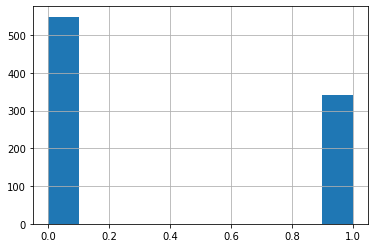

In [ ]:
train.Survived.hist()

In [ ]:
  import statistics


In [ ]:
statistics.stdev(train['Survived']==0)

0.48659245426485753

# **Ensembling & Stacking models**

In [ ]:
test['Median_age']=test['Median_age'].astype((int))

In [ ]:
train['Fare']=train['Fare'].astype((int))

In [ ]:
train['Median_age']=train['Median_age'].astype((int))

In [ ]:
train= train.drop(['PassengerId'], axis=1)

In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Median_age    0
Title         0
Agebins       0
dtype: int64

We train and validate on the training data and test it on test data: Many a times, people first split their dataset into 2 — Train and Test. After this, they keep aside the Test set, and randomly choose X% of their Train dataset to be the actual Train set and the remaining (100-X)% to be the Validation set, where X is a fixed number(say 80%), the model is then iteratively trained and validated on these different sets.

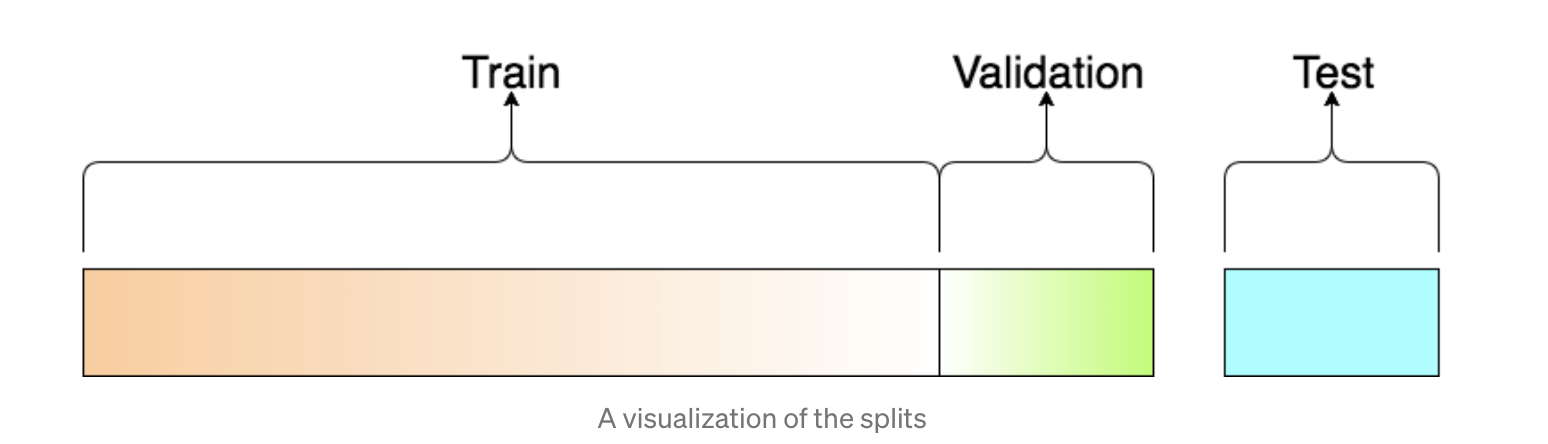

In [ ]:
train_dummy[['Fare','Median_age','Sex_female','Sex_male' , 'Embarked_C', 'Embarked_Q','Embarked_S','Title_Master', 'Title_Misc','Title_Miss','Title_Mr',          
'Title_Mrs']]= train_dummy[['Fare','Median_age','Sex_female','Sex_male' , 'Embarked_C', 'Embarked_Q','Embarked_S','Title_Master', 'Title_Misc','Title_Miss','Title_Mr',          
'Title_Mrs']].astype((int))

In [ ]:
train_dummy['Agebins'] = pd.factorize(train_dummy['Agebins'])[0]

In [ ]:
train_dummy.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
SibSp           int64
Parch           int64
Fare            int64
FamilySize      int64
IsAlone         int64
Median_age      int64
Sex_female      int64
Sex_male        int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
Title_Master    int64
Title_Misc      int64
Title_Miss      int64
Title_Mr        int64
Title_Mrs       int64
Agebins         int64
dtype: object

In [ ]:
train_dummy['Agebins'].value_counts()

0    493
1    213
3    105
2     69
4     11
Name: Agebins, dtype: int64

In [ ]:
test_dummy[['Fare','Median_age','Sex_female','Sex_male' , 'Embarked_C', 'Embarked_Q','Embarked_S','Title_Master', 'Title_Misc','Title_Miss','Title_Mr',          
'Title_Mrs']]= test_dummy[['Fare','Median_age','Sex_female','Sex_male' , 'Embarked_C', 'Embarked_Q','Embarked_S','Title_Master', 'Title_Misc','Title_Miss','Title_Mr',          
'Title_Mrs']].astype((int))

In [ ]:
test_dummy['Agebins'] = pd.factorize(test_dummy['Agebins'])[0]

In [ ]:
X = train_dummy.drop(['Survived'], axis = 1)
y = train_dummy["Survived"]
X_test = test_dummy

# There are multiple ways of splitting data. They are...

train_test_split.
cross_validation.
We have separated dependent and independent features; We have separated train and test data. So, why do we still have to split our training data? If you are curious about that, I have the answer. For this competition, when we train the machine learning algorithms, we use part of the training set usually two-thirds of the train data. Once we train our algorithm using 2/3 of the train data, we start to test our algorithms using the remaining data. If the model performs well we dump our test data in the algorithms to predict and submit the competition. The code below, basically splits the train data into 4 parts, X_train, X_test, y_train, y_test.

*   X_train and y_train first used to train the algorithm.
*   then, X_test is used in that trained algorithms to predict outcomes.
*   Once we get the outcomes, we compare it with y_test

By comparing the outcome of the model with y_test, we can determine whether our algorithms are performing well or not. As we compare we use confusion matrix to determine different aspects of model performance.

P.S. When we use cross validation it is important to remember not to use X_train, X_test, y_train and y_test, rather we will use X and y. I will discuss more on that.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size = .3, random_state=0)

In [ ]:
X_train.dtypes

PassengerId     int64
Pclass          int64
SibSp           int64
Parch           int64
Fare            int64
FamilySize      int64
IsAlone         int64
Median_age      int64
Sex_female      int64
Sex_male        int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
Title_Master    int64
Title_Misc      int64
Title_Miss      int64
Title_Mr        int64
Title_Mrs       int64
Agebins         int64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_val)

In [ ]:
logreg=LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
logreg.score(X_train,y_train)

0.8346709470304976

In [ ]:
logreg.score(X_val,y_val)

0.8059701492537313

In [ ]:
y_pred = logreg.predict(X_test)

**What the difference between the accuracy score vs .score matric?



```
 y_pred = logreg.predict(X_test)
 accuracy_score(y_test, y_pred)

 And 

 logreg.score(X_test,y_test)
```

1) you train one model logreg.train(X_train,Y_train)

2) the resulting model does not explain the training data 100% well (that would probably be overfitting).

3) if you use now the X_train to make predictions you will not get exactly Y_train, but Y_train', different somehow Y_train' = logreg.predict(X_train)

4) logreg.score(X_train,Y_train) is calculating the difference between Y_train and Y_train' (an accuracy measure), but you did not need to explicitly calculate Y_train'. The library does this internally.

If you try this (once the model trained with the train data):



```
    Y_pred = logreg.predict(X_test)

    logreg.score(X_test,Y_pred)
```
this score will always give 1.0

(because it compares Y_pred' (which the library calculates internally as Y_pred'= logreg.predict(X_test) ) with Y_pred; but Y_pred is also logreg.predict(X_test), because the code we wrote)

if Y_test is the real labels for X_test



```
   logreg.score(X_test, Y_test) 
```


is comparing the predictions of the model against the real labels.

In other words:

A. predictor.score(X,Y) internally calculates Y'=predictor.predict(X) and then compares Y' against Y to give an accuracy measure. This applies not only to logistic regression but to any other model.

B. logreg.score(X_train,Y_train) is measuring the accuracy of the model against the training data. (How well the model explains the data it was trained with). <-- But note that this has nothing to do with test data.

C. logreg.score(X_test, Y_test) is equivalent to your print(classification_report(Y_test, Y_pred)). But you do not need to calculate Y_pred; that is done internally by the library



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [ ]:
result1=cross_val_score(logreg,X,y,cv=10,scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
lcv = result1.mean()

# **DummyClassifier**

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dum_maj=DummyClassifier(strategy='most_frequent').fit(X_train,y_train)

In [ ]:
dum_maj.score(X_train,y_train)

0.6115569823434992

In [ ]:
dum_maj.score(X_val,y_val)

0.6268656716417911

In [ ]:
y_pred_dum = dum_maj.predict(X_test)

In [ ]:
result3=cross_val_score(dum_maj,X,y,cv=10,scoring='accuracy')

In [ ]:
 DC_cv = result3.mean()

# **BaggingRegressor**

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
num_trees=np.linspace(50,2000,10)

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
oob_res=[]
for trs in num_trees:
    res = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=int(trs),oob_score=True,random_state=0).fit(X_train, y_train)
    oob_res.append(res.oob_score_)

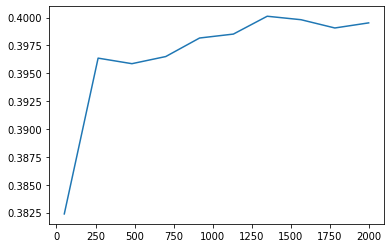

In [ ]:
plt.plot(num_trees,oob_res)

In [ ]:
num_trees[np.argmax(oob_res)]

1350.0

In [ ]:
opt_trs=int(num_trees[np.argmax(oob_res)])
opt_trs

1350

In [ ]:
rfs = RandomForestClassifier(n_estimators=1350,max_features='sqrt',random_state=0).fit(X_train,y_train)

In [ ]:
rfs.score(X_train,y_train)

1.0

In [ ]:
rfs.score(X_val,y_val)

0.8134328358208955

In [ ]:
y_pred = rfs.predict(X_test)

In [ ]:
result=cross_val_score(rfs,X,y,cv=10,scoring='accuracy')

In [ ]:
BR_cv = result.mean()

# **Gradient Boosting**

In [ ]:
from tqdm import tqdm
cvres=[]
for num in tqdm(num_trees):
   rf_cv_clf = GradientBoostingClassifier(n_estimators = num, max_features='sqrt',max_depth=4,random_state=0,learning_rate=0.1)
   cvclf = cross_validate(rf_cv_clf, X_train, y_train, cv=5, scoring='f1')
   cvres.append(cvclf['test_score'].mean())

In [ ]:
num_trees[np.argmax(cvres)]

50.0

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'learning_rate':[0.1,0.01,0.001], 'n_estimators':[300,400,500,600,1000],'max_depth':[2,3,4,5,6,8]}

In [ ]:
bmod = GradientBoostingClassifier(random_state=0)

In [ ]:
boost_regr = GridSearchCV(bmod, parameters)
boost_regr.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'n_estimators': [300, 400, 500, 600, 1000]})

In [ ]:
df=pd.DataFrame.from_dict(boost_regr.cv_results_)

In [ ]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.262803,0.007910,0.003469,0.000736,0.1,2,300,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.752,0.816,0.760,0.822581,0.830645,0.796245,0.033282,33
1,0.328661,0.006124,0.003029,0.000127,0.1,2,400,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.752,0.840,0.752,0.814516,0.830645,0.797832,0.038300,31
2,0.409018,0.003920,0.003691,0.001137,0.1,2,500,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.744,0.832,0.760,0.806452,0.814516,0.791394,0.033592,39
3,0.493141,0.008756,0.003350,0.000181,0.1,2,600,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.744,0.832,0.752,0.814516,0.798387,0.788181,0.034580,42
4,0.834731,0.006644,0.004437,0.000343,0.1,2,1000,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.736,0.824,0.744,0.822581,0.790323,0.783381,0.037498,48


In [ ]:
df[df['mean_test_score']==df['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
33,0.499297,0.006585,0.003327,0.000246,0.01,2,600,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est...",0.824,0.832,0.808,0.814516,0.846774,0.825058,0.013587,1


In [ ]:
digit_boost = GradientBoostingClassifier(n_estimators=600, learning_rate=00.1,max_depth=2, random_state=0).fit(X_train, y_train)

In [ ]:
digit_boost.score(X_val,y_val)

0.8432835820895522

In [ ]:
digit_boost.score(X_train,y_train)

0.9486356340288925

In [ ]:
y_pred1 = digit_boost.predict(X_test)

In [ ]:
DB_cv = cross_val_score(digit_boost,X,y,cv=10,scoring='accuracy').mean()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_cv_results=[]
for k in range(1,50):
    knn_Classifier = KNeighborsClassifier(n_neighbors=k)
    cv_nn = cross_validate(knn_Classifier, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    knn_cv_results.append(cv_nn['test_score'].mean())

In [ ]:
np.argmax(knn_cv_results)

34

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 34).fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn.score(X_train,y_train)

0.6613162118780096

In [ ]:
knn.score(X_val,y_val)

0.6865671641791045

In [ ]:
result_knn=cross_val_score(knn,X,y,cv=10,scoring='accuracy')

In [ ]:
Knn_cv = result_knn.mean()

#**Gaussian Naive Bayes** 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GNB = GaussianNB()
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1).fit(X_train,y_train)

In [ ]:
grad.score(X_train,y_train)

0.9983948635634029

In [ ]:
grad.score(X_val,y_val)

0.8208955223880597

In [ ]:
y_pred = grad.predict(X_test)

In [ ]:
result_grad=cross_val_score(grad,X,y,cv=10,scoring='accuracy')

In [ ]:
NB_cv = result_grad.mean()

# **Final Results**

In [ ]:
pd.DataFrame({'Models':['LogisticRegression','Dummy Classifier','BaggingRegressor','GradientBoosting','KNN','Gaussian Naive Bayes'],
'Accuracy on Train':[logreg.score(X_train,y_train).round(3), dum_maj.score(X_train,y_train).round(3),rfs.score(X_train,y_train).round(3),digit_boost.score(X_train,y_train).round(3),knn.score(X_train,y_train).round(3),grad.score(X_train,y_train).round(3)],
'Accuracy on Validation': [logreg.score(X_val,y_val).round(3),dum_maj.score(X_val,y_val).round(3),rfs.score(X_val,y_val).round(3),digit_boost.score(X_val,y_val).round(3),knn.score(X_val,y_val).round(3),grad.score(X_val,y_val).round(3)],
'Maen Accuracy on K fold cv' : [lcv.round(3), DC_cv.round(3),BR_cv.round(3),DB_cv.round(3),Knn_cv.round(3),NB_cv.round(3)]})

,Models,Accuracy on Train,Accuracy on Validation,Maen Accuracy on K fold cv
0,LogisticRegression,0.835,0.806,0.816
1,Dummy Classifier,0.612,0.627,0.616
2,BaggingRegressor,1.000,0.813,0.815
3,GradientBoosting,0.949,0.843,0.779
4,KNN,0.661,0.687,0.650
5,Gaussian Naive Bayes,0.998,0.821,0.768


In [ ]:
submission = pd.DataFrame({"PassengerId": test_dummy['PassengerId'],"Survived": y_pred1})

In [ ]:
submission

,PassengerId,Survived
0,892,1
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
